In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

In [2]:
ls crime_data_raw/2014

apr14.xls*  dec14.xls*  jan14.xls*  jun_ed_14.xls*  may14.xls*  oct14.xls*
aug14.xls*  feb14.xls*  jul14.xls*  mar14.xls*      nov14.xls*  sep14.xls*


In [3]:
path = 'crime_data_raw/2014'

In [4]:
ls crime_data_raw/

10years/    2007/  2011/  2014_raw.csv*  2016_raw.csv*
1985_2014/  2008/  2012/  2015/          2017/
2005/       2009/  2013/  2015_raw.csv*  2017_raw.csv*
2006/       2010/  2014/  2016/          premise_codes.csv*


In [5]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [6]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [7]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [9]:
df.Hour.value_counts(dropna=False)

18    7073
15    7068
16    7006
12    6865
17    6841
14    6637
19    6515
13    6301
20    6206
10    6144
11    6102
9     5743
21    5560
8     5324
22    5295
0     4712
7     4308
23    4305
6     2874
2     2583
1     2559
3     2039
5     1970
4     1719
24       1
Name: Hour, dtype: int64

In [14]:
df = df[df.Hour != 24]

In [15]:
df.Hour.value_counts(dropna=False)

18    7073
15    7068
16    7006
12    6865
17    6841
14    6637
19    6515
13    6301
20    6206
10    6144
11    6102
9     5743
21    5560
8     5324
22    5295
0     4712
7     4308
23    4305
6     2874
2     2583
1     2559
3     2039
5     1970
4     1719
Name: Hour, dtype: int64

In [16]:
df['Hour'] = df['Hour'].astype(str) + ':00'

In [17]:
df.head()

,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Premise,Street Name,StreetName,Suffix,Type
0,NaN,1.0,NaN,NaN,14D30,8500-8599,NaN,2014-04-19,17:00,Murder,18D,MARTIN LUTHER KING,NaN,-,BLVD
1,NaN,1.0,NaN,NaN,10H20,3600-3699,NaN,2014-04-28,5:00,Murder,13R,MCKINNEY,NaN,-,ST
2,NaN,3.0,NaN,NaN,5F30,7400-7499,NaN,2014-04-27,18:00,Murder,20A,HILLMONT,NaN,-,-
3,NaN,2.0,NaN,NaN,17E10,5400-5499,NaN,2014-04-09,18:00,Murder,20A,RENWICK,NaN,-,-
4,NaN,1.0,NaN,NaN,18F50,9300-9399,NaN,2014-04-24,3:00,Murder,03B,RICHMOND,NaN,-,AVE


In [18]:
df[df.Date.isnull()]

,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Premise,Street Name,StreetName,Suffix,Type
54412,NaN,NaN,1.0,NaN,13D40,8500-8599,NaN,NaT,15:00,Theft,NaN,SAM HOUSTON,NaN,S,PKWY
56526,NaN,NaN,1.0,NaN,18F40,2700-2799,NaN,NaT,14:00,Robbery,NaN,DUNVALE,NaN,-,RD
64547,1.0,NaN,NaN,NaN,14D40,5600-5699,NaN,NaT,8:00,Burglary,NaN,SELINSKY,NaN,-,RD
69191,1.0,NaN,NaN,NaN,7C20,3900-3999,NaN,NaT,11:00,Theft,NaN,CAVALCADE,NaN,-,-


In [19]:
df = df.dropna(subset=['Date'])

In [20]:
df[df.Date.isnull()]

,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Premise,Street Name,StreetName,Suffix,Type


In [21]:
df.to_csv('crime_data_raw/2014_raw.csv')

In [22]:
path = 'crime_data_raw/2014_raw.csv'

In [23]:
df = pd.read_csv(path,parse_dates=[['Date', 'Hour']])

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,7,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
df.head()

,Date_Hour,Unnamed: 0,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Offense Type,Premise,Street Name,StreetName,Suffix,Type
0,2014-04-19 17:00:00,0,NaN,1.0,NaN,NaN,14D30,8500-8599,NaN,Murder,18D,MARTIN LUTHER KING,NaN,-,BLVD
1,2014-04-28 05:00:00,1,NaN,1.0,NaN,NaN,10H20,3600-3699,NaN,Murder,13R,MCKINNEY,NaN,-,ST
2,2014-04-27 18:00:00,2,NaN,3.0,NaN,NaN,5F30,7400-7499,NaN,Murder,20A,HILLMONT,NaN,-,-
3,2014-04-09 18:00:00,3,NaN,2.0,NaN,NaN,17E10,5400-5499,NaN,Murder,20A,RENWICK,NaN,-,-
4,2014-04-24 03:00:00,4,NaN,1.0,NaN,NaN,18F50,9300-9399,NaN,Murder,03B,RICHMOND,NaN,-,AVE


## Inspect Premise col

In [25]:
len(df.Premise.value_counts(dropna=False))

251

In [26]:
df.Premise.value_counts(dropna=False).head()

NaN                   29576
20R                    6410
Residence or House     6384
20A                    6094
18A                    6072
Name: Premise, dtype: int64

In [27]:
#df.Premise.unique()

In [28]:
df.Premise = df.Premise.str.strip()

In [29]:
len(df.Premise.value_counts(dropna=False))

251

In [30]:
df.Premise.value_counts(dropna=False).head()

NaN                   29576
20R                    6410
Residence or House     6384
20A                    6094
18A                    6072
Name: Premise, dtype: int64

In [31]:
# check if  null values
df.isnull().values.any().any()

True

In [32]:
# check su, of null values
df.isnull().values.sum()

638474

In [33]:
len(df[df.isnull().any(axis=1)])

121745

## Visualize our data

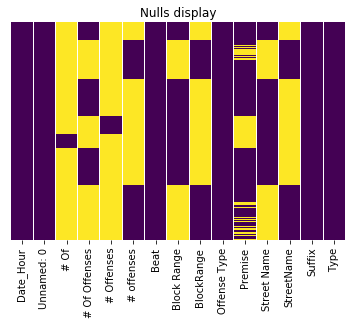

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

## col cleaning

- joining similar columns
- renaming

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121745 entries, 0 to 121744
Data columns (total 15 columns):
Date_Hour        121745 non-null datetime64[ns]
Unnamed: 0       121745 non-null int64
# Of             7611 non-null float64
# Of Offenses    52214 non-null float64
# Offenses       10316 non-null float64
# offenses       51604 non-null float64
Beat             121729 non-null object
Block Range      69984 non-null object
BlockRange       51604 non-null object
Offense Type     121745 non-null object
Premise          92169 non-null object
Street Name      70141 non-null object
StreetName       51604 non-null object
Suffix           121745 non-null object
Type             121745 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(9)
memory usage: 13.9+ MB


In [36]:
df.head()

,Date_Hour,Unnamed: 0,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Offense Type,Premise,Street Name,StreetName,Suffix,Type
0,2014-04-19 17:00:00,0,NaN,1.0,NaN,NaN,14D30,8500-8599,NaN,Murder,18D,MARTIN LUTHER KING,NaN,-,BLVD
1,2014-04-28 05:00:00,1,NaN,1.0,NaN,NaN,10H20,3600-3699,NaN,Murder,13R,MCKINNEY,NaN,-,ST
2,2014-04-27 18:00:00,2,NaN,3.0,NaN,NaN,5F30,7400-7499,NaN,Murder,20A,HILLMONT,NaN,-,-
3,2014-04-09 18:00:00,3,NaN,2.0,NaN,NaN,17E10,5400-5499,NaN,Murder,20A,RENWICK,NaN,-,-
4,2014-04-24 03:00:00,4,NaN,1.0,NaN,NaN,18F50,9300-9399,NaN,Murder,03B,RICHMOND,NaN,-,AVE


In [37]:
# 2014
# if duplicate columns

df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
                              df['BlockRange'].dropna()]).reindex_like(df)

df['StreetName'] = pd.concat([df['Street Name'].dropna(),
                              df['StreetName'].dropna()]).reindex_like(df)

df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
                              df['# Of Offenses'].dropna(),
                              df['# offenses'].dropna(),
                              df['# Offenses'].dropna()]).reindex_like(df)

In [38]:
df.head()

,Date_Hour,Unnamed: 0,# Of,# Of Offenses,# Offenses,# offenses,Beat,Block Range,BlockRange,Offense Type,Premise,Street Name,StreetName,Suffix,Type
0,2014-04-19 17:00:00,0,NaN,1.0,NaN,NaN,14D30,8500-8599,8500-8599,Murder,18D,MARTIN LUTHER KING,MARTIN LUTHER KING,-,BLVD
1,2014-04-28 05:00:00,1,NaN,1.0,NaN,NaN,10H20,3600-3699,3600-3699,Murder,13R,MCKINNEY,MCKINNEY,-,ST
2,2014-04-27 18:00:00,2,NaN,3.0,NaN,NaN,5F30,7400-7499,7400-7499,Murder,20A,HILLMONT,HILLMONT,-,-
3,2014-04-09 18:00:00,3,NaN,2.0,NaN,NaN,17E10,5400-5499,5400-5499,Murder,20A,RENWICK,RENWICK,-,-
4,2014-04-24 03:00:00,4,NaN,1.0,NaN,NaN,18F50,9300-9399,9300-9399,Murder,03B,RICHMOND,RICHMOND,-,AVE


In [39]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121745 entries, 0 to 121744
Data columns (total 15 columns):
Date_Hour      121745 non-null datetime64[ns]
Unnamed: 0     121745 non-null int64
# Of           7611 non-null float64
NumOffenses    121745 non-null float64
# Offenses     10316 non-null float64
# offenses     51604 non-null float64
Beat           121729 non-null object
Block Range    69984 non-null object
BlockRange     121588 non-null object
OffenseType    121745 non-null object
Premise        92169 non-null object
Street Name    70141 non-null object
StreetName     121745 non-null object
Suffix         121745 non-null object
Type           121745 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(9)
memory usage: 13.9+ MB


In [40]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
#     'Block Range': 'BlockRange',
#     'Street Name': 'StreetName'
# }, inplace=True)
# df.info()

## Subset dataframe to work on 

In [41]:
crimes = df[['Date_Hour','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121745 entries, 0 to 121744
Data columns (total 7 columns):
Date_Hour      121745 non-null datetime64[ns]
Beat           121729 non-null object
BlockRange     121588 non-null object
StreetName     121745 non-null object
OffenseType    121745 non-null object
Premise        92169 non-null object
NumOffenses    121745 non-null float64
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 6.5+ MB


In [42]:
crimes.head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
0,2014-04-19 17:00:00,14D30,8500-8599,MARTIN LUTHER KING,Murder,18D,1.0
1,2014-04-28 05:00:00,10H20,3600-3699,MCKINNEY,Murder,13R,1.0
2,2014-04-27 18:00:00,5F30,7400-7499,HILLMONT,Murder,20A,3.0
3,2014-04-09 18:00:00,17E10,5400-5499,RENWICK,Murder,20A,2.0
4,2014-04-24 03:00:00,18F50,9300-9399,RICHMOND,Murder,03B,1.0


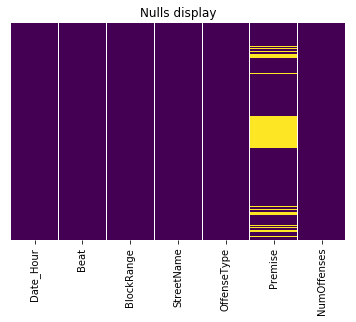

In [43]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

# FIND NAN onevery col

In [44]:
len(crimes[crimes.isnull()])

121745

In [45]:
len(crimes[crimes.Beat.isnull()])

16

In [46]:
crimes[crimes.Beat.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
52628,2014-07-19 11:00:00,NaN,2100-2199,VINTAGE,Theft,NaN,1.0
52629,2014-07-13 08:00:00,NaN,500-599,W.38TH,Theft,NaN,1.0
52630,2014-07-26 15:00:00,NaN,6100-6199,ATTWATER,Rape,NaN,1.0
52631,2014-07-13 15:00:00,NaN,7800-7899,FM 1960,Theft,NaN,1.0
52632,2014-07-14 09:00:00,NaN,6600-6699,MERRY,Theft,NaN,1.0
52633,2014-07-22 20:00:00,NaN,NaN,WALKER,Theft,NaN,1.0
52634,2014-07-03 02:00:00,NaN,8400-8499,S. GESSNER,Theft,NaN,1.0
52635,2014-07-16 13:00:00,NaN,NaN,PEASE,Theft,NaN,1.0
52636,2014-07-26 14:00:00,NaN,6100-6199,ATTWATER,Rape,NaN,1.0
52637,2014-07-10 20:00:00,NaN,800-899,GESSNER SUITE 970,Theft,NaN,1.0


In [47]:
len(crimes[crimes.BlockRange.isnull()])

157

In [48]:
crimes[crimes.BlockRange.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
52633,2014-07-22 20:00:00,NaN,NaN,WALKER,Theft,NaN,1.0
52635,2014-07-16 13:00:00,NaN,NaN,PEASE,Theft,NaN,1.0
52654,2014-07-27 07:00:00,10H10,NaN,212.5 LENOX,Burglary,NaN,1.0
53200,2014-07-02 12:00:00,10H80,NaN,2600 DUNLAVY + WESTHEIMER,Auto Theft,NaN,1.0
53518,2014-07-12 11:00:00,12D10,NaN,EDGEBROOK,Theft,NaN,1.0
53657,2014-07-31 17:00:00,12D10,NaN,EDGEBROOK,Theft,NaN,1.0
53756,2014-07-07 06:00:00,12D20,NaN,1,Auto Theft,NaN,1.0
53809,2014-07-06 17:00:00,12D30,NaN,GULF,Theft,NaN,1.0
54404,2014-07-11 12:00:00,13D40,NaN,PEARLAND,Theft,NaN,1.0
55324,2014-07-04 10:00:00,16E10,NaN,ALMEDA GENOA,Theft,NaN,1.0


In [49]:
len(crimes[crimes.StreetName.isnull()])

0

In [50]:
crimes[crimes.StreetName.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [51]:
len(crimes[crimes.OffenseType.isnull()])

0

In [52]:
crimes[crimes.OffenseType.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [53]:
len(crimes[crimes.Premise.isnull()])

29576

In [54]:
crimes[crimes.Premise.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
10412,2014-08-08 18:00:00,10H10,5300-5399,HARRISBURG,Aggravated Assault,NaN,1.0
10419,2014-08-23 00:00:00,10H10,UNK,ENNIS,Theft,NaN,1.0
10420,2014-08-25 12:00:00,10H10,100-199,LOCKWOOD,Theft,NaN,1.0
10423,2014-08-02 18:00:00,10H10,200-299,ROBERTS,Theft,NaN,1.0
10448,2014-07-27 15:00:00,10H10,3900-3999,BERING,Aggravated Assault,NaN,1.0
10453,2014-08-19 13:00:00,10H10,1900-1999,RUNNELS,Theft,NaN,1.0
10459,2014-08-13 11:00:00,10H10,6200-6299,CANAL,Theft,NaN,1.0
10462,2014-08-16 15:00:00,10H10,2700-2799,NAVIGATION,Theft,NaN,1.0
10482,2014-08-23 13:00:00,10H20,4600-4699,PARK,Burglary,NaN,1.0
10493,2014-08-28 04:00:00,10H20,1100-1199,WYATT,Theft,NaN,1.0


In [56]:
len(crimes[crimes.NumOffenses.isnull()])

0

In [57]:
crimes[crimes.NumOffenses.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


## Find NaN
- drop if > 2 nan

In [58]:
len(crimes[crimes.isnull().any(axis=1)])

29576

In [59]:
crimes[crimes.isnull().any(axis=1)][:10]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
10412,2014-08-08 18:00:00,10H10,5300-5399,HARRISBURG,Aggravated Assault,NaN,1.0
10419,2014-08-23 00:00:00,10H10,UNK,ENNIS,Theft,NaN,1.0
10420,2014-08-25 12:00:00,10H10,100-199,LOCKWOOD,Theft,NaN,1.0
10423,2014-08-02 18:00:00,10H10,200-299,ROBERTS,Theft,NaN,1.0
10448,2014-07-27 15:00:00,10H10,3900-3999,BERING,Aggravated Assault,NaN,1.0
10453,2014-08-19 13:00:00,10H10,1900-1999,RUNNELS,Theft,NaN,1.0
10459,2014-08-13 11:00:00,10H10,6200-6299,CANAL,Theft,NaN,1.0
10462,2014-08-16 15:00:00,10H10,2700-2799,NAVIGATION,Theft,NaN,1.0
10482,2014-08-23 13:00:00,10H20,4600-4699,PARK,Burglary,NaN,1.0
10493,2014-08-28 04:00:00,10H20,1100-1199,WYATT,Theft,NaN,1.0


In [60]:
#crimes = crimes.dropna(thresh=2)

In [61]:
#crimes[crimes.isnull().any(axis=1)]

## Joint dataframes

In [62]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121749 entries, 0 to 121748
Data columns (total 8 columns):
Date_Hour              121745 non-null datetime64[ns]
Beat                   121729 non-null object
BlockRange             121588 non-null object
StreetName             121745 non-null object
OffenseType            121745 non-null object
Premise                92173 non-null object
NumOffenses            121745 non-null float64
Premise Description    51699 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 8.4+ MB


In [63]:
crimes.head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
0,2014-04-19 17:00:00,14D30,8500-8599,MARTIN LUTHER KING,Murder,18D,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
1,2014-04-13 02:00:00,3B10,4400-4499,SHERWOOD,Robbery,18D,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
2,2014-04-11 12:00:00,16E30,5300-5399,OREM,Theft,18D,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
3,2014-04-12 11:00:00,13D20,6600-6699,TELEPHONE,Theft,18D,1.0,LAUNDRY/DRY CLEANERS PARKING LOT
4,2014-04-13 15:00:00,8C50,8800-8899,TIDWELL,Theft,18D,1.0,LAUNDRY/DRY CLEANERS PARKING LOT


In [64]:
len(crimes[crimes['Premise Description'].isnull()])

70050

In [65]:
crimes[crimes['Premise Description'].isnull()].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
48535,2014-04-26 04:00:00,18F50,7400-7499,HARWIN,Robbery,---,1.0,NaN
48536,2014-04-23 20:00:00,19G50,9900-9999,BISSONNET,Robbery,---,1.0,NaN
48537,2014-04-25 12:00:00,12D20,11800-11899,SOUTH SAM HOUSTON,Robbery,---,1.0,NaN
48538,2014-04-23 20:00:00,15E10,9700-9799,HILLCROFT,Aggravated Assault,---,1.0,NaN
48539,2014-04-02 04:00:00,12D20,12000-12099,BEAMER,Burglary,---,1.0,NaN


## Problem
- find nan values on one col, and copy related col

In [66]:
crimes.Premise.unique()[:10]

array(['18D', '13R', '20A', '03B', '250', '20D', '20N', '18A', '20R',
       '20C'], dtype=object)

In [67]:
crimes[crimes['Premise'] == '---'].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
48535,2014-04-26 04:00:00,18F50,7400-7499,HARWIN,Robbery,---,1.0,NaN
48536,2014-04-23 20:00:00,19G50,9900-9999,BISSONNET,Robbery,---,1.0,NaN
48537,2014-04-25 12:00:00,12D20,11800-11899,SOUTH SAM HOUSTON,Robbery,---,1.0,NaN
48538,2014-04-23 20:00:00,15E10,9700-9799,HILLCROFT,Aggravated Assault,---,1.0,NaN
48539,2014-04-02 04:00:00,12D20,12000-12099,BEAMER,Burglary,---,1.0,NaN


In [68]:
len(crimes[crimes['Premise'] == '---'])

492

In [69]:
len(crimes[crimes['Premise'] == 'N'])

18

In [70]:
crimes[crimes['Premise'] == 'N'].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
52102,2014-04-01 16:00:00,3B10,13400-13499,PINEMONT,Theft,N,1.0,NaN
52103,2014-04-10 15:00:00,10H40,1000-1099,ELGIN,Theft,N,1.0,NaN
52104,2014-02-11 16:00:00,19G30,7800-7899,COOK,Aggravated Assault,N,1.0,NaN
52105,2014-02-14 15:00:00,19G10,9500-9599,SOUTHWEST,Theft,N,1.0,NaN
52106,2014-02-22 21:00:00,10H30,1000-1099,ST EMANUEL,Theft,N,1.0,NaN


In [71]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [72]:
len(crimes[crimes['Premise Description'].isnull()])

29576

In [73]:
crimes[crimes['Premise'] == '---'].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
48535,2014-04-26 04:00:00,18F50,7400-7499,HARWIN,Robbery,---,1.0,---
48536,2014-04-23 20:00:00,19G50,9900-9999,BISSONNET,Robbery,---,1.0,---
48537,2014-04-25 12:00:00,12D20,11800-11899,SOUTH SAM HOUSTON,Robbery,---,1.0,---
48538,2014-04-23 20:00:00,15E10,9700-9799,HILLCROFT,Aggravated Assault,---,1.0,---
48539,2014-04-02 04:00:00,12D20,12000-12099,BEAMER,Burglary,---,1.0,---


In [74]:
crimes[crimes['Premise'] == 'N'].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
52102,2014-04-01 16:00:00,3B10,13400-13499,PINEMONT,Theft,N,1.0,N
52103,2014-04-10 15:00:00,10H40,1000-1099,ELGIN,Theft,N,1.0,N
52104,2014-02-11 16:00:00,19G30,7800-7899,COOK,Aggravated Assault,N,1.0,N
52105,2014-02-14 15:00:00,19G10,9500-9599,SOUTHWEST,Theft,N,1.0,N
52106,2014-02-22 21:00:00,10H30,1000-1099,ST EMANUEL,Theft,N,1.0,N


## Visualize data

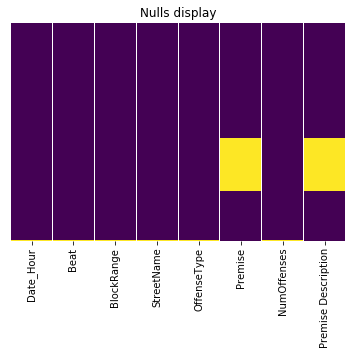

In [75]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

## Display any null values

In [76]:
len(crimes[crimes.isnull().any(axis=1)])

29580

In [77]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
94307,2014-09-28 02:00:00,UNK,7900-7999,GESSNER,Theft,NaN,1.0,NaN
121745,NaT,NaN,NaN,NaN,NaN,02V,NaN,VACANT BANK
121746,NaT,NaN,NaN,NaN,NaN,09V,NaN,VACANT HOSPITAL
121747,NaT,NaN,NaN,NaN,NaN,13C,NaN,CONTRA-FLOW/HOV
121748,NaT,NaN,NaN,NaN,NaN,15V,NaN,VACANT JAIL/PRISON


## drop rows with 2 or 3 or more NaN

In [78]:
crimes = crimes.dropna(thresh=3)

In [79]:
len(crimes[crimes.isnull().any(axis=1)])

29576

In [80]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
94303,2014-09-27 02:00:00,UNK,700-799,FM 1960,Aggravated Assault,NaN,1.0,NaN
94304,2014-09-07 11:00:00,UNK,500-599,MARSHALL,Theft,NaN,1.0,NaN
94305,2014-09-04 15:00:00,UNK,9400-9499,FM 1960,Theft,NaN,1.0,NaN
94306,2014-09-14 19:00:00,UNK,12600-12699,LAKE HOUSTON,Theft,NaN,1.0,NaN
94307,2014-09-28 02:00:00,UNK,7900-7999,GESSNER,Theft,NaN,1.0,NaN


## Inspect each column

In [81]:
crimes.dtypes

Date_Hour              datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Premise Description            object
dtype: object

## Beat

In [82]:
len(crimes.Beat.value_counts())

234

In [83]:
len(crimes.Beat.value_counts(dropna=False))

235

In [84]:
crimes.Beat.unique()

array(['14D30', '3B10', '16E30', '13D20', '8C50', '14D40', '13D10',
       '2A50', '17E10', '15E20', '14D20', '10H10', '3B40', '2A20',
       '12D10', '15E30', '18F40', '20G60', '20G70', '5F10', '1A30',
       '1A40', '4F10', '3B50', '8C10', '1A50', '19G50', '18F50', '18F60',
       '16E20', '10H20', '2A10', '17E30', '2A40', '2A30', '8C60', '1A10',
       '1A20', '11H30', '10H40', '10H50', '19G40', '11H10', '14D10',
       '6B30', '20G20', '16E40', '20G50', '6B40', '17E40', '19G10',
       '18F20', '15E40', '9C40', '7C20', '6B50', '19G20', '7C30', '12D20',
       '10H70', '5F20', '7C10', '4F20', '20G30', '20G10', '20G40',
       '24C50', '6B20', '17E20', '6B60', '10H60', '11H20', '7C50', '5F30',
       '9C10', '10H30', '5F40', '2A60', '24C20', '20G80', '12D30',
       '11H40', '19G30', '8C40', '12D60', '12D50', '10H80', '9C20',
       '6B10', '9C30', '18F30', '4F30', '11H50', '15E10', '7C40', '8C30',
       '12D70', '24C10', '24C60', '18F10', '24C30', '8C20', 'UNK',
       '16E10', '12

In [85]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [86]:
len(crimes.Beat.value_counts(dropna=False))

235

In [87]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [88]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

124

In [89]:
crimes.Beat.unique()

array(['14D30', '3B10', '16E30', '13D20', '8C50', '14D40', '13D10',
       '2A50', '17E10', '15E20', '14D20', '10H10', '3B40', '2A20',
       '12D10', '15E30', '18F40', '20G60', '20G70', '5F10', '1A30',
       '1A40', '4F10', '3B50', '8C10', '1A50', '19G50', '18F50', '18F60',
       '16E20', '10H20', '2A10', '17E30', '2A40', '2A30', '8C60', '1A10',
       '1A20', '11H30', '10H40', '10H50', '19G40', '11H10', '14D10',
       '6B30', '20G20', '16E40', '20G50', '6B40', '17E40', '19G10',
       '18F20', '15E40', '9C40', '7C20', '6B50', '19G20', '7C30', '12D20',
       '10H70', '5F20', '7C10', '4F20', '20G30', '20G10', '20G40',
       '24C50', '6B20', '17E20', '6B60', '10H60', '11H20', '7C50', '5F30',
       '9C10', '10H30', '5F40', '2A60', '24C20', '20G80', '12D30',
       '11H40', '19G30', '8C40', '12D60', '12D50', '10H80', '9C20',
       '6B10', '9C30', '18F30', '4F30', '11H50', '15E10', '7C40', '8C30',
       '12D70', '24C10', '24C60', '18F10', '24C30', '8C20', 'UNK',
       '16E10', '12

In [90]:
crimes.Beat.value_counts(dropna=False).head()

19G10    2667
1A20     2606
6B60     2547
13D20    2460
1A10     2454
Name: Beat, dtype: int64

## BlockRange

In [91]:
len(crimes.BlockRange.value_counts(dropna=False))

251

In [92]:
crimes.BlockRange.value_counts(dropna=False).head()

100-199      1880
2300-2399    1671
900-999      1636
1000-1099    1415
4400-4499    1412
Name: BlockRange, dtype: int64

In [93]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [94]:
len(crimes.BlockRange.value_counts(dropna=False))

251

## StreetName

In [95]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7970


In [96]:
crimes.StreetName = crimes.StreetName.str.strip()

In [97]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7970


In [98]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3458
NORTH         1790
GULF          1756
GESSNER       1680
RICHMOND      1628
Name: StreetName, dtype: int64


## OffenseType

In [99]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [100]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [101]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [102]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 66672
Burglary              21144
Auto Theft            13454
Robbery                9997
Aggravated Assault     9460
Rape                    788
Murder                  230
Name: OffenseType, dtype: int64


## Premise

In [103]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:251


In [104]:
crimes.Premise = crimes.Premise.str.strip()

In [105]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:251


In [106]:
crimes.Premise.value_counts(dropna=False).head()

NaN                   29576
20R                    6410
Residence or House     6384
20A                    6094
18A                    6072
Name: Premise, dtype: int64

## Premise Description

In [107]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:251


In [108]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [109]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:251


In [110]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

NaN                      29576
RESIDENCE/HOUSE           6410
Residence or House        6384
APARTMENT                 6094
APARTMENT PARKING LOT     6072
Name: Premise Description, dtype: int64


# Set Date as index

In [111]:
#df.Date_Hour.value_counts(dropna=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121745 entries, 0 to 121744
Data columns (total 15 columns):
Date_Hour      121745 non-null datetime64[ns]
Unnamed: 0     121745 non-null int64
# Of           7611 non-null float64
NumOffenses    121745 non-null float64
# Offenses     10316 non-null float64
# offenses     51604 non-null float64
Beat           121729 non-null object
Block Range    69984 non-null object
BlockRange     121588 non-null object
OffenseType    121745 non-null object
Premise        92169 non-null object
Street Name    70141 non-null object
StreetName     121745 non-null object
Suffix         121745 non-null object
Type           121745 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(9)
memory usage: 13.9+ MB


In [112]:
# date
crimes.Date_Hour = pd.to_datetime(crimes.Date_Hour)

crimes = crimes.set_index('Date_Hour').sort_index(ascending=True)

In [113]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
Date_Hour,,,,,,,
1914-09-08 07:00:00,24C60,12700-12799,LAKE HOUSTON,Burglary,Restaurant or Cafeteria,1.0,Restaurant or Cafeteria
1914-11-02 03:00:00,18F60,8800-8899,BELLAIRE,Burglary,Miscellaneous Business (Non-Specific),1.0,Miscellaneous Business (Non-Specific)
1914-12-03 19:00:00,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,NaN
1920-06-28 16:00:00,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,NaN
1924-12-09 11:00:00,UNK,11000-11099,EASTEX,Theft,Strip Business Center Parking Lot,1.0,Strip Business Center Parking Lot


## Create Columns with day,weekday,month,year from date index

In [114]:
# get day, weekday,month ,year
crimes['Hour'] = crimes.index.strftime('%H')
crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [115]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,,
1914-09-08 07:00:00,24C60,12700-12799,LAKE HOUSTON,Burglary,Restaurant or Cafeteria,1.0,Restaurant or Cafeteria,07,08,Tuesday,Sep,1914
1914-11-02 03:00:00,18F60,8800-8899,BELLAIRE,Burglary,Miscellaneous Business (Non-Specific),1.0,Miscellaneous Business (Non-Specific),03,02,Monday,Nov,1914
1914-12-03 19:00:00,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,NaN,19,03,Thursday,Dec,1914
1920-06-28 16:00:00,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,NaN,16,28,Monday,Jun,1920
1924-12-09 11:00:00,UNK,11000-11099,EASTEX,Theft,Strip Business Center Parking Lot,1.0,Strip Business Center Parking Lot,11,09,Tuesday,Dec,1924


## null values

- check
- count
- display

In [116]:
crimes.isnull().values.any().any()

True

In [117]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

29576

In [118]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,,
1914-12-03 19:00:00,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,NaN,19,03,Thursday,Dec,1914
1920-06-28 16:00:00,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,NaN,16,28,Monday,Jun,1920
1987-12-15 19:00:00,9C40,13300-13399,HALIFAX,Rape,NaN,1.0,NaN,19,15,Tuesday,Dec,1987
1992-01-01 14:00:00,14D20,7400-7499,CALHOUN,Rape,NaN,1.0,NaN,14,01,Wednesday,Jan,1992
2001-08-01 19:00:00,10H50,3000-3099,CLEBURNE,Theft,NaN,1.0,NaN,19,01,Wednesday,Aug,2001
2002-01-01 11:00:00,6B10,11200-11299,BISCAYNE,Rape,NaN,1.0,NaN,11,01,Tuesday,Jan,2002
2002-08-17 11:00:00,1A10,6200-6299,HERMANN PARK,Theft,NaN,1.0,NaN,11,17,Saturday,Aug,2002
2003-07-01 15:00:00,1A10,8100-8199,RICHMOND,Theft,NaN,1.0,NaN,15,01,Tuesday,Jul,2003
2003-07-02 14:00:00,18F30,UNK,FOUNTAIN VIEW,Theft,NaN,1.0,NaN,14,02,Wednesday,Jul,2003


In [119]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121745 entries, 1914-09-08 07:00:00 to 2019-12-25 19:00:00
Data columns (total 12 columns):
Beat                   121729 non-null object
BlockRange             121588 non-null object
StreetName             121745 non-null object
OffenseType            121745 non-null object
Premise                92169 non-null object
NumOffenses            121745 non-null float64
Premise Description    92169 non-null object
Hour                   121745 non-null object
day                    121745 non-null object
weekday                121745 non-null object
month                  121745 non-null object
year                   121745 non-null object
dtypes: float64(1), object(11)
memory usage: 14.6+ MB


## New Dataframe
- remove premise col
- keep premise description

In [120]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1914-09-08 07:00:00,24C60,12700-12799,LAKE HOUSTON,Burglary,Restaurant or Cafeteria,1.0,07,08,Tuesday,Sep,1914
1914-11-02 03:00:00,18F60,8800-8899,BELLAIRE,Burglary,Miscellaneous Business (Non-Specific),1.0,03,02,Monday,Nov,1914
1914-12-03 19:00:00,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,19,03,Thursday,Dec,1914
1920-06-28 16:00:00,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,16,28,Monday,Jun,1920
1924-12-09 11:00:00,UNK,11000-11099,EASTEX,Theft,Strip Business Center Parking Lot,1.0,11,09,Tuesday,Dec,1924


In [121]:
crime_yr.isnull().values.any().any()

True

In [122]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

29576

In [123]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1914-12-03 19:00:00,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,19,03,Thursday,Dec,1914
1920-06-28 16:00:00,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,16,28,Monday,Jun,1920
1987-12-15 19:00:00,9C40,13300-13399,HALIFAX,Rape,NaN,1.0,19,15,Tuesday,Dec,1987
1992-01-01 14:00:00,14D20,7400-7499,CALHOUN,Rape,NaN,1.0,14,01,Wednesday,Jan,1992
2001-08-01 19:00:00,10H50,3000-3099,CLEBURNE,Theft,NaN,1.0,19,01,Wednesday,Aug,2001
2002-01-01 11:00:00,6B10,11200-11299,BISCAYNE,Rape,NaN,1.0,11,01,Tuesday,Jan,2002
2002-08-17 11:00:00,1A10,6200-6299,HERMANN PARK,Theft,NaN,1.0,11,17,Saturday,Aug,2002
2003-07-01 15:00:00,1A10,8100-8199,RICHMOND,Theft,NaN,1.0,15,01,Tuesday,Jul,2003
2003-07-02 14:00:00,18F30,UNK,FOUNTAIN VIEW,Theft,NaN,1.0,14,02,Wednesday,Jul,2003


# FIND NANS

## INDEX

In [124]:
len(crime_yr[crime_yr.index.isnull()])

0

In [125]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [126]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1914-09-08 07:00:00', '1914-11-02 03:00:00',
               '1914-12-03 19:00:00', '1920-06-28 16:00:00',
               '1924-12-09 11:00:00', '1971-02-03 06:00:00',
               '1973-05-01 23:00:00', '1980-05-01 00:00:00',
               '1984-01-23 14:00:00', '1987-12-15 19:00:00',
               ...
               '2014-12-31 21:00:00', '2014-12-31 22:00:00',
               '2014-12-31 22:00:00', '2014-12-31 22:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00',
               '2014-12-31 23:00:00', '2014-12-31 23:00:00',
               '2014-12-31 23:00:00', '2019-12-25 19:00:00'],
              dtype='datetime64[ns]', name='Date_Hour', length=121745, freq=None)

In [127]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [128]:
len(crime_yr[crime_yr.Beat.isnull()])

16

In [130]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
2013-06-11 22:00:00,NaN,2200-2299,W. DALLAS,Burglary,NaN,1.0,22,11,Tuesday,Jun,2013
2013-12-01 11:00:00,NaN,700-799,W. DONOVAN,Theft,NaN,1.0,11,01,Sunday,Dec,2013
2014-06-05 13:00:00,NaN,2600-2699,LP W 405,Theft,NaN,1.0,13,05,Thursday,Jun,2014
2014-06-11 14:00:00,NaN,400-499,MAIN,Theft,NaN,1.0,14,11,Wednesday,Jun,2014
2014-06-13 14:00:00,NaN,5400-5499,WEST LOOP S SER,Theft,NaN,1.0,14,13,Friday,Jun,2014


In [131]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [132]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [133]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## BlockRAnge

In [134]:
len(crime_yr[crime_yr.BlockRange.isnull()])

157

In [135]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
2007-07-01 10:00:00,1A10,NaN,LITTLE YORK RD,Theft,NaN,1.0,10,01,Sunday,Jul,2007
2013-06-11 11:00:00,1A10,NaN,HAYES,Theft,NaN,1.0,11,11,Tuesday,Jun,2013
2013-06-29 15:00:00,1A10,NaN,RUSK,Theft,NaN,1.0,15,29,Saturday,Jun,2013
2013-11-23 08:00:00,1A10,NaN,METROPOLITAN,Theft,NaN,1.0,08,23,Saturday,Nov,2013
2014-01-01 13:00:00,1A10,NaN,TIDWELL RD,Theft,NaN,1.0,13,01,Wednesday,Jan,2014


## StreetName

In [136]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

In [137]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## OffenseType

In [138]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

In [139]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Hour

In [140]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [141]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Premsie Description

In [142]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

29576

In [143]:
crime_yr[crime_yr['Premise Description'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1914-12-03 19:00:00,12D20,12800-12899,GULF,Auto Theft,NaN,1.0,19,03,Thursday,Dec,1914
1920-06-28 16:00:00,17E40,12100-12199,FAIRMEADOW,Theft,NaN,1.0,16,28,Monday,Jun,1920
1987-12-15 19:00:00,9C40,13300-13399,HALIFAX,Rape,NaN,1.0,19,15,Tuesday,Dec,1987
1992-01-01 14:00:00,14D20,7400-7499,CALHOUN,Rape,NaN,1.0,14,01,Wednesday,Jan,1992
2001-08-01 19:00:00,10H50,3000-3099,CLEBURNE,Theft,NaN,1.0,19,01,Wednesday,Aug,2001


In [144]:
crime_yr['Premise Description'] = crime_yr['Premise Description'].replace(np.nan, 'No label')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [146]:
crime_yr[crime_yr['Premise Description'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [147]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

157

In [148]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
2007-07-01 10:00:00,1A10,NaN,LITTLE YORK RD,Theft,No label,1.0,10,01,Sunday,Jul,2007
2013-06-11 11:00:00,1A10,NaN,HAYES,Theft,No label,1.0,11,11,Tuesday,Jun,2013
2013-06-29 15:00:00,1A10,NaN,RUSK,Theft,No label,1.0,15,29,Saturday,Jun,2013
2013-11-23 08:00:00,1A10,NaN,METROPOLITAN,Theft,No label,1.0,08,23,Saturday,Nov,2013
2014-01-01 13:00:00,1A10,NaN,TIDWELL RD,Theft,No label,1.0,13,01,Wednesday,Jan,2014
2014-04-21 14:00:00,1A10,NaN,HUNTINGTON VENTURE DR,Theft,No label,1.0,14,21,Monday,Apr,2014
2014-04-26 11:00:00,1A10,NaN,JENSEN DR / SAUNDERS,Theft,No label,1.0,11,26,Saturday,Apr,2014
2014-05-08 12:00:00,1A10,NaN,LOCKWOOD,Theft,No label,1.0,12,08,Thursday,May,2014
2014-05-16 08:00:00,1A10,NaN,HOLLY HALL,Theft,No label,1.0,08,16,Friday,May,2014


## Save

In [149]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121745 entries, 1914-09-08 07:00:00 to 2019-12-25 19:00:00
Data columns (total 11 columns):
Beat           121745 non-null object
BlockRange     121588 non-null object
StreetName     121745 non-null object
OffenseType    121745 non-null object
Premise        121745 non-null object
NumOffenses    121745 non-null float64
Hour           121745 non-null object
day            121745 non-null object
weekday        121745 non-null object
month          121745 non-null object
year           121745 non-null object
dtypes: float64(1), object(10)
memory usage: 11.1+ MB


/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [150]:
crime_yr.Hour.unique()

array(['07', '03', '19', '16', '11', '06', '23', '00', '14', '13', '22',
       '12', '20', '15', '21', '18', '08', '10', '17', '02', '05', '09',
       '01', '04'], dtype=object)

In [ ]:
ls crime_data_clean/new

In [151]:
#crime_yr.to_csv('crime_data_clean/new/Final_crime14_clean.csv')
crime_yr.to_csv('crime_data_clean/years/Final_crime14_clean.csv')

In [153]:
ls crime_data_clean/years

Final_crime14_clean.csv*  Final_crime16_clean.csv*
Final_crime15_clean.csv*  Final_crime17_clean.csv*
